In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression as reg

In [40]:
def predict(men, women, test):
    k_men = KernelDensity(kernel='gaussian', bandwidth=1.5)
    k_women = KernelDensity(kernel='gaussian', bandwidth=1.5)

    men_weight_model = k_men.fit(men[:,1].reshape(-1, 1))
    women_weight_model = k_women.fit(women[:,1].reshape(-1, 1))

    hist_men_height, _ = np.histogram(men[:,0], np.linspace(0,240, 25))
    hist_women_height, _ = np.histogram(women[:,0], np.linspace(0,240, 25))
    samples_men = len(men[:,0])
    samples_women = len(women[:,0])

    model_men_height = hist_men_height / samples_men
    model_women_height = hist_women_height / samples_women

    test_height = test[0]
    test_weight = test[1]
    test_height_bin = test_height // 10
    prob_men_heigh = model_men_height[test_height_bin]
    prob_woman_heigh = model_women_height[test_height_bin]

    prob_weight_men = np.exp(men_weight_model.score_samples(test_weight.reshape(1,1)))
    prob_weight_woman = np.exp(women_weight_model.score_samples(test_weight.reshape(1,1)))
    if prob_weight_woman * prob_woman_heigh > prob_weight_men * prob_men_heigh:
        return 'woman'
    else:
        return 'men'

In [41]:
data = pd.read_csv('heightWeightData_short.txt', header=None)
data = data.to_numpy()

men = data[data[:,0] == 1][:, 1:]
women = data[data[:,0] == 2][:, 1:]

predict(men, women, np.array([165,80]))


'men'

(array([ 1.,  2.,  4., 16., 24., 23., 15., 10.,  5.,  1.]),
 array([139.7  , 144.526, 149.352, 154.178, 159.004, 163.83 , 168.656,
        173.482, 178.308, 183.134, 187.96 ]),
 <BarContainer object of 10 artists>)

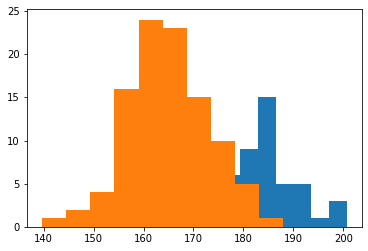

In [4]:
data = pd.read_csv('heightWeightData_short.txt', header=None)
data = data.to_numpy()

men = data[data[:,0] == 1][:, 1:]
women = data[data[:,0] == 2][:, 1:]

k_men = KernelDensity(kernel='gaussian', bandwidth=1.5)
k_women = KernelDensity(kernel='gaussian', bandwidth=1.5)

men_weight_model = k_men.fit(men[:,0].reshape(-1, 1))
women_weight_model = k_women.fit(women[:,0].reshape(-1, 1))

hist_men_height, _ = np.histogram(men[:,1], np.linspace(0,240, 25))
hist_women_height, _ = np.histogram(women[:,1], np.linspace(0,240, 25))
samples_men = len(men[:,1])
samples_women = len(women[:,1])

model_men_height = hist_men_height / samples_men
model_women_height = hist_women_height / samples_women


plt.hist(men[:,0])
plt.hist(women[:,0])

# s1 = np.array([174,87]).reshape(1,-1)
# s=np.exp(k_men.fit(men).score_samples(s1))

In [5]:
def RegressionWithCosts(s, y, costs=None):
    X = np.c_[np.ones(s.shape[0]), s]
    Xt = np.transpose(X)
    if costs is None:
        W = np.eye(s.shape[0])
    else:
        W = np.diag(costs)

    inv = np.linalg.inv(np.dot(np.dot(Xt, W), X))
    coefs = np.dot(np.dot(np.dot(inv, Xt), W), y)
    return coefs


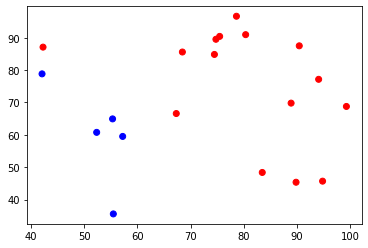

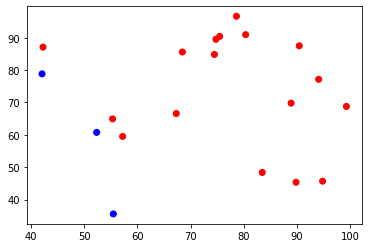

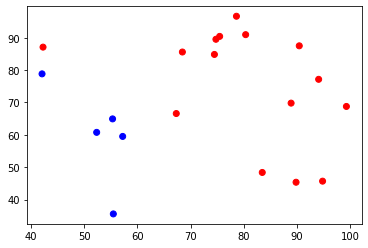

In [12]:
data = pd.read_csv('dataset.txt', header=None)
data = data.to_numpy()
X = data[:80,:2]
y = data[:80,2]

test_data = data[80:,:2]

model1 = reg().fit(X, y)
out1 = model1.predict_proba(X)[:,1]
X2 = np.c_[X, out1]

model2 = reg().fit(X2, y)

results1 = model1.predict(test_data)

test_for2 = np.c_[test_data, results1]

results2 = model2.predict(test_for2)

# results2[results2 >= 0.5] = 1
# results2[results2 < 0.5] = 0

expected_class = data[80:,2]

cascade_res = results2.reshape(-1,1)

expected_class.astype(int) == results2.astype(int)
colors = ['blue' if l == 0 else 'red' for l in results2]
plt.scatter(test_data[:,0], test_data[:,1], color=colors)
plt.show()

colors = ['blue' if l == 0 else 'red' for l in data[80:,2]]
plt.scatter(test_data[:,0], test_data[:,1], color=colors)
plt.show()

# results1[results1 >= 0.5] = 1
# results1[results1< 0.5] = 0

colors = ['blue' if l == 0 else 'red' for l in results1]
plt.scatter(test_data[:,0], test_data[:,1], color=colors)
plt.show()

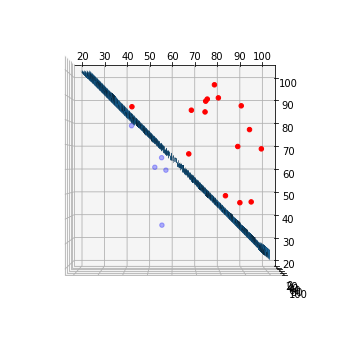

In [7]:
from mpl_toolkits.mplot3d import Axes3D
def cartesian_product(*arrays):
    la = len(arrays)
    dtype = np.result_type(*arrays)
    arr = np.empty([len(a) for a in arrays] + [la], dtype=dtype)
    for i, a in enumerate(np.ix_(*arrays)):
        arr[...,i] = a
    return arr.reshape(-1, la)

a = np.linspace(0,100,100)
c = cartesian_product(a,a,a)
r = -1.4111273694329798 + c[:,0]*0.01504925+c[:,1]*0.01525218+c[:,2]*0.00045932
rr=r<0.51
rrr=r>0.49
d = np.logical_and(rr, rrr)
sel =np.where(d==True)
oh=c[sel,:]
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(oh[0,:,0],oh[0,:,1],oh[0,:,2, np.newaxis], alpha=0.5)

colors = ['blue' if l == 0 else 'red' for l in results2]
ax.scatter(test_data[:,0], test_data[:,1], results1, color=colors)
ax.view_init(elev=90., azim=270)
plt.show()